# Import Statements & Global Variables

In [75]:
### import statements ###

import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import pickle
import matplotlib.animation as animation
# import itertools

plt.rcParams['axes.linewidth'] = 1
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'

c:\Users\jeffc\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6857: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


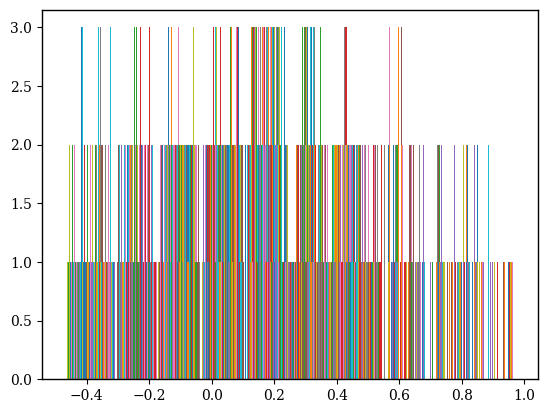

In [ ]:
# def random_matrix(N):
#     H = np.zeros((N,N))
#     for i in range(N):
#         for j in range(N):
#             H[i][j] = 2*random.random() - 1
#     return H

# data=[]
# for i in range(30):
#     N = 3
#     eigval,eigvec = np.linalg.eig(random_matrix(N))
#     for j in range(len(eigvec)):
#         for k in range(len(eigvec)):
#             data.append(eigvec[j]*eigvec[k])
#     plt.hist(data)

# Functions

In [ ]:
### functions ###

def identity(N):
    # N: dimension
    I = np.zeros((N,N))
    for i in range(N):
        I[i][i] = 1
    return I

def sigmaz():
    sz = np.zeros((2,2),dtype=np.complex_)
    sz[0][0] = 1
    sz[1][1] = -1
    return sz

def sigmax():
    sx = np.zeros((2,2),dtype=np.complex_)
    sx[0][1] = 1
    sx[1][0] = 1
    return sx

def sigmay():
    sy = np.zeros((2,2),dtype=np.complex_)
    sy[0][1] = -1j
    sy[1][0] = 1j
    return sy

def sigmaplus():
    sp = np.zeros((2,2),dtype=np.complex_)
    sp[0][1] = 1
    return sp

def sigmaminus():
    sm = np.zeros((2,2),dtype=np.complex_)
    sm[1][0] = 1
    return sm

def groundstate(L):
    ### representation of vacuum state by means of Jordan-Wigner transformation ###

    # L: number of sites
    spe = np.array((0,1)) # spe: single particle eigenstate
    npe = spe # npe: N particle eigenstate 
    for i in range(L-1):
        npe = np.tensordot(spe,npe,axes=0)

    return npe.flatten()

def ODFFHam(t,v,k):
    return - 2 * t * np.cos( k ) + v

def Hamiltonian(t,v,Num,g):
    ### exactly diagonalize single particle free fermion Hamiltonian ###

    # t: hopping stregth
    # v: constant on-site potential
    # Num: number of sites
    # g: "perturbation" strength; multiplies a random variable in the range [0,1]; dimensionless

    H = np.zeros((Num,Num), dtype=np.float64) # writes 0_NxN
    for i in range (Num):
        H[i][i] = v + g*random.random() # random perturbation with "strength" g
        # H[i][i] = v*(1+(-1)**i) # alternating v
    for i in range(Num):
        H[i-1][i] = -t
        H[i][i-1] = -t
    # # the following account for PBC
    H[0][Num-1] = -t
    H[Num-1][0] = -t
    # the following account for OBC
    # H[0][Num-1] = 0
    # H[Num-1][0] = 0
    return H

def Hamiltonian2(t,v,Num,g,epsilon):
    ### exactly diagonalize single particle free fermion Hamiltonian ###

    # t: hopping stregth
    # v: constant on-site potential
    # Num: number of sites
    # g: "perturbation"; should be a list of Num values

    H = np.zeros((Num,Num),dtype=np.float64) # writes 0_NxN
    for i in range (Num):
        H[i][i] = v + g*epsilon[i] # random perturbation with "strength" g
        # H[i][i] = v*(1+(-1)**i) # alternating v
    for i in range(Num):
        H[i-1][i] = -t
        H[i][i-1] = -t
    # # the following account for PBC
    H[0][Num-1] = -t
    H[Num-1][0] = -t
    # the following account for OBC
    # H[0][Num-1] = 0
    # H[Num-1][0] = 0
    return H

def random_list(Num):
    rdm_list = np.array([random.random() for i in range(Num)])
    return rdm_list

def kronecker_delta(i, j):
    if i == j:
        return 1
    else:
        return 0

# Exact Single Particle Spectrum

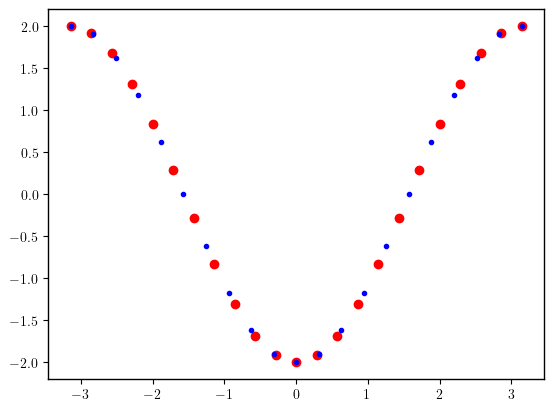

In [141]:
### plot exact single-particle spectrum ###

kp = np.linspace(-np.pi,np.pi,23)
plt.scatter(kp,ODFFHam(1,0,kp),color='r')

k = np.linspace(-np.pi,np.pi,21)
plt.scatter(k,ODFFHam(1,0,k),color='b',marker='.')

# Numerical Single Particle Spectrum and Eigenstates

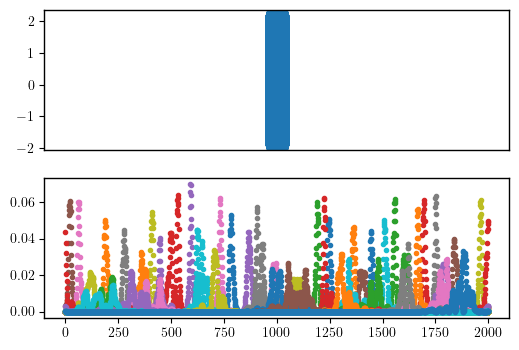

In [82]:
### plot output from c++ ###

# load data
eigenvalues = np.loadtxt('ODFF_eigval_t=1_v=0.1_g=0.1.txt')
eigenvectors = np.loadtxt('ODFF_eigvec_t=1_v=0.1_g=0.1.txt').T # the suffix .T takes the transpose of the data such that the eigenstates are the rows of the full matrix U

# x-vals
zeros = np.zeros(len(eigenvalues))
site = np.linspace(0,len(eigenvectors[0]),len(eigenvectors[0])) # all have the same number of sites, using 0 arbitrarily

# configure plot
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# plot eigenvalues
ax1.scatter(zeros,eigenvalues,s=1000,marker='.')
ax1.set_xticks([])

# plot eigenvectors 
for i in range(51):
    ax2.scatter(site,np.abs(eigenvectors[i])**2,marker='.',label='E'+str(i))
# ax2.set_ylim(-1e-3,0.015)
# ax2.legend(ncol=5,frameon=False)

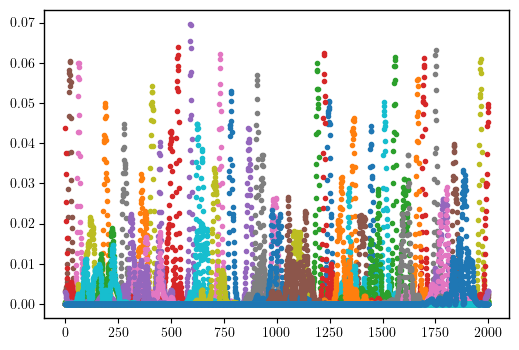

In [83]:
### let's focus on the eigenvectors ###

# plot figure
fig = plt.figure(figsize=(6,4))
for i in range(51):
    plt.scatter(site,np.abs(eigenvectors[i])**2,marker='.',label='E'+str(i))

# Equal Time One Particle Pure State Correlation Functions

Text(0, 0.5, '$\\langle \\hat{c}_{j}^{\\dagger}\\hat{c}_{i} \\rangle$ $\\times 10^{-11}$ ($j=1000$)')

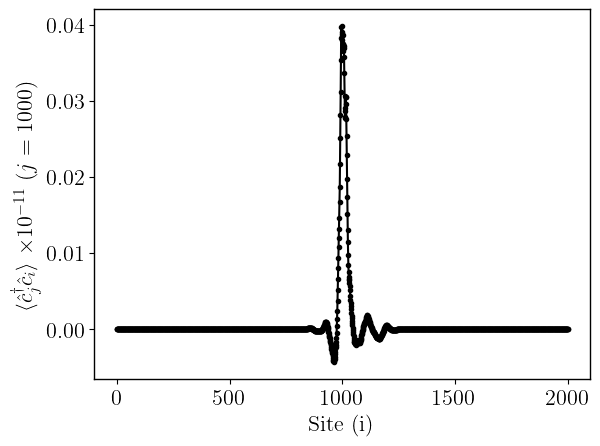

In [487]:
### one particle correlation functions ###

# single particle
def C(i,j,k):
    # i,j: integers; site indices
    # k: integer; eigenvalue index
    C = eigenvectors[k][j] * eigenvectors[k][i]
    return C

# N particles
def NC(i,j,nk):
    # i,j: integers; site indices
    # nk: list of 0 and 1; represents eigenstate in energy occupation basis, ordered
    NC = []
    k = 0
    for n in nk:
        NC.append(n*C(i,j,k))
        k += 1
    return sum(NC)

nq = np.zeros(len(site)) # vacuum state
Np = 51 # number of total particles, should be odd to avoid questions of degneracy

# np particle ground state
for i in range(Np): 
    nq[i] = 1

j=1000

ManyC = [NC(i,j,nq) for i in range(len(site))]

fig = plt.figure()
fig.tight_layout()
plt.plot(site,ManyC,marker='.',color='black')
plt.tick_params(labelsize=16)
plt.xlabel('Site (i)',fontsize=16)
plt.ylabel(r'$\langle \hat{c}_{j}^{\dagger}\hat{c}_{i} \rangle$ $\times 10^{-11}$ ($j=1000$)',fontsize=16)
# plt.yscale('log')

Text(0, 0.5, '$\\langle \\hat{c}_{j}^{\\dagger}\\hat{c}_{i} \\rangle$ ($j=1000$)')

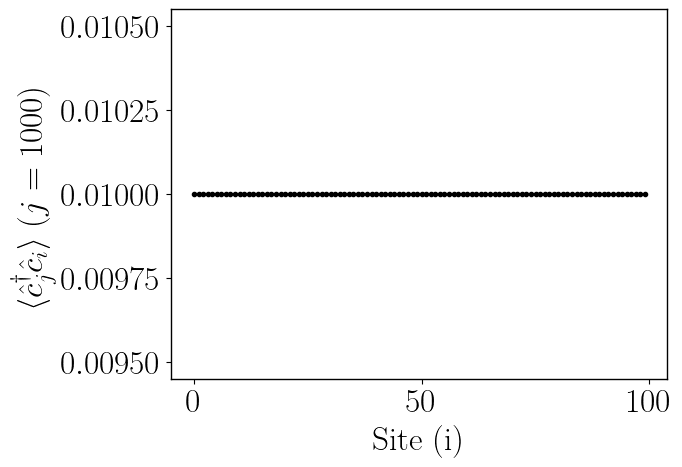

In [127]:
### exact case ###

# one body correlations
def Ce(i,j,k,Num):
# i: int
# j: int
# k: int <= Num/2
# Num: int
    q = 2*np.pi*k/Num
    z=complex(0,q*(j-i))
    correlation = np.exp(z) / Num
    return correlation

# N body correlations
def NCe(nq,i,j,Num):
    # nq: numpy array of fermion occupancies; array representation of occupation state in k space; 
    #       should by Num long with inputs either 0 or 1
    # i: int
    # j: int
    # k: int < Num
    # Num: int
    NCorrelations = []
    n = 0
    for l in nq:
        if n == 0:
            NCorrelations.append(l*Ce(i,j,n,Num))
        elif n%2 == 1:
            NCorrelations.append(l*Ce(i,j,(n+1)/2,Num))
        else:
            NCorrelations.append(l*Ce(i,j,-n/2,Num))
        n += 1

    return sum(NCorrelations)

Num = 100
j = 50
nq = np.zeros(Num)
site = np.linspace(0,Num-1,Num)
Np = 1 # number of total particles, should be odd to avoid questions of degneracy

# np particle ground state
for i in range(Np): 
    nq[i] = 1 

ManyCe = [NCe(nq,i,j,Num) for i in range(len(site))]

fig = plt.figure()
fig.tight_layout()
plt.plot(site,ManyCe,marker='.',color='black')
plt.tick_params(labelsize=24)
plt.xlabel('Site (i)',fontsize=24)
plt.ylabel(r'$\langle \hat{c}_{j}^{\dagger}\hat{c}_{i} \rangle$ ($j=1000$)',fontsize=24)
# plt.yscale('log')

# N-Body Quench Dynamics

### N-body Functions

In [23]:
def SPOverlap2(wf1,mode1,wf2,mode2):
    """
    L: number of sites
    wf1,wf2: LxL matrix of eigenvectors; also called U matrix
    mode1,mode2: relevant eigenenergy mode number
    """
    return np.sum(np.conj(wf1[mode1]) * wf2[mode2])
    

def SlaterMatN(N,qs,gs):
    """
    N: number of particles; if L is even, this should be odd
        and vice versa--avoids degenerate ground states. This
        is necessary when using numeric eigenstates.
    qs: quenched state; list of L entries
    gs: ground state; list of L entries
    mode: list of N integers corresponding tot e
    """
    S = np.zeros((N,N),dtype=np.float64)
    for i in range(N):
        for j in range(N):
            S[i,j] = SPOverlap2(qs,j,gs,i)
    
    return S

def GaussianMat(N,wf1,wf2,E2,t):
    """
    Construct P matrix of Guassian states.

    N: number of particles
    wf1: matrix of pre-quench states, should be a row matrix
    wf2: matrix of post-quench states, should be a row matrix
    E2: array of post-quench energy eigenvalues
    t: time

    NOTE: information about the total number of sites L should be 
    contained within wf1,wf2, and E2. 
    """
    P = wf1[:N].T # we want P to be a column matrix, hence .T
    U = wf2.T
    z = np.array([complex(0,E2[j]*t) for j in range(len(E2))])
    D = np.diag(np.exp(z))
    P1 = np.matmul(np.conj(U.T),P)
    P2 = np.matmul(D,P1)
    P3 = np.matmul(U,P2)
    return P3

def NCorrMat(P):
    """
    Calculatte the N-body correlation matrix by exploiting the 
    properties of Slater determinants and fermionic gaussian
    states.

    P: GaussianMat(N,sf1,wf2,E2,t)
    """
    Correlation = np.matmul(P,np.conj(P.T))
    return Correlation

def NCorr2(i,j,L,P):
    """
    Alternative way of calculating N-body correlation function by exploiting the 
    properties of Slater determinants and fermionic gaussian states. Will be use-
    ful later when considering hard core bosons. 

    i,j: site indices; integers
    L: number of sites
    P: GaussianMat(N,sf1,wf2,E2,t)
    """
    dumzero = np.array([np.zeros(L)]) 
    # the reason the above function is an array of an array is a bit silly, but it is ultimately because GaussianMat
    # spits out an array of arrays, and to append the above to the former, they must have the same shape.
    ### Pi ###
    dumzero[0][i] = 1
    Pi = np.append(P.T,dumzero,axis=0) # no .T
    dumzero[0][i] = 0 # reset dumzero
    ### Pj ###
    dumzero[0][j] = 1
    Pj = np.append(P.T,dumzero,axis=0).T # note the .T here 

    return np.linalg.det(np.matmul(np.conj(Pi),Pj))

### Quench: translationally invariant -> random on-site potential

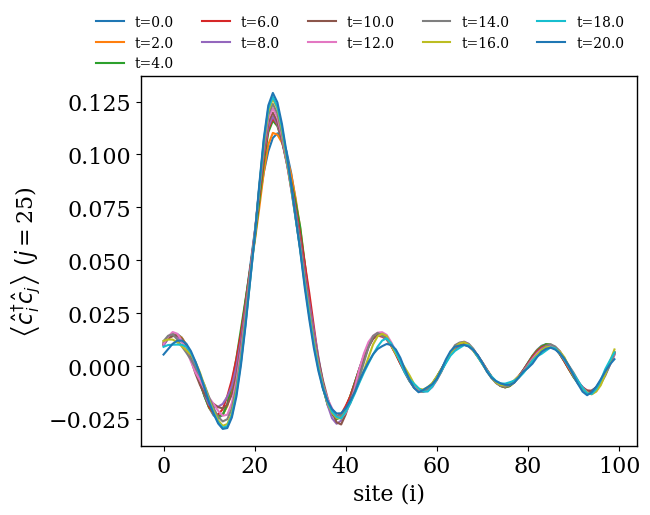

In [21]:
"""
Pre-quench: translationally invariant with v=cte. on-site potential v=0.1
Post-quench: random perturbation on-site potential with g=1
Hopping paramter t=1
L=100 sites
Periodic boundary conditions
"""

eigenvectors = np.loadtxt('ODFF_eigvec_t=1_v=0.1_g=0.1_L=100.txt').T 
eigenvalues = np.loadtxt('ODFF_eigval_t=1_v=0.1_g=0.1_L=100.txt')
planewaves = np.loadtxt('ODFF_eigvec_t=1_v=0.1_g=0_L=100.txt').T
planewave_eigval = np.loadtxt('ODFF_eigval_t=1_v=0.1_g=0_L=100.txt')
sites = np.linspace(0,99,100,dtype=int)

###########################################################
### occupations; various times; prequench to postquench ###
###########################################################
# times = np.linspace(0,1,)
# for time in times:
#     n = [1-NCorr(i,i,100,11,planewaves,eigenvectors,eigenvalues,time) for i in sites]
#     plt.plot(sites,n,label='t='+str(np.round(time,3)))
# plt.xlabel('site (i)',fontsize=16)
# plt.ylabel(r'$\left\langle \hat{c}_{i}^{\dagger}\hat{c}_{i}\right\rangle$',fontsize=16)
# plt.tick_params(labelsize=16)
# plt.legend(ncols=5,loc='upper right',bbox_to_anchor=(1,1.15),fancybox=True,shadow=True)



###################################################################
### i != j correlations; various times; prequench to postquench ###
###################################################################
j = 25
times = np.linspace(0,20,11)
for time in times:
    P = GaussianMat(11,planewaves,eigenvectors,eigenvalues,time)
    Cij = [NCorr(i,j,P) for i in sites]
    plt.plot(sites,Cij,label='t='+str(np.round(time,2)))
plt.xlabel('site (i)',fontsize=16)
plt.ylabel(r'$\left\langle \hat{c}_{i}^{\dagger}\hat{c}_{j}\right\rangle$ $(j=$'+str(j)+')',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(ncols=5,loc='upper right',bbox_to_anchor=(1,1.2),frameon=False,shadow=True)

### Quench: half step, L=100

c:\Users\jeffc\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\jeffc\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


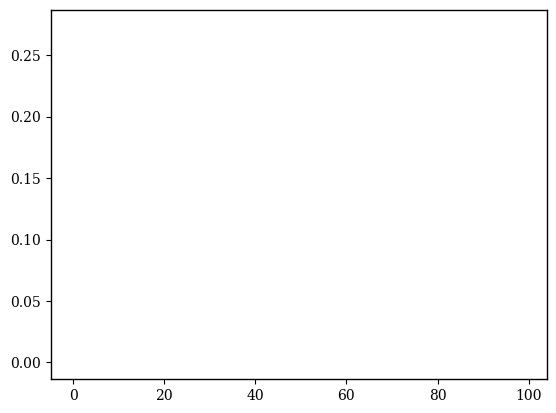

In [29]:
prequench_state = np.loadtxt('ODFF_shift_eigvec_t=1_v=0.1_g=100_L=100.txt').T
prequench_energy = np.loadtxt('ODFF_shift_eigval_t=1_v=0.1_g=100_L=100.txt')
postquench_state = np.loadtxt('ODFF_shift_eigvec_t=1_v=0.1_g=0_L=100.txt').T
postquench_energy = np.loadtxt('ODFF_shift_eigval_t=1_v=0.1_g=0_L=100.txt')
sites = np.linspace(0,99,100,dtype=int)

#############################################
### plot pre- and post-quench eigenstates ###
#############################################
# plt.plot(sites,np.abs(prequench_state[0])**2,color='black')
# plt.plot(sites,np.abs(postquench_state[0])**2,color='gray')

##########################################################
### occupations; time evolved, prequench to postquench ###
##########################################################
# times = np.linspace(0,99,10)
# for time in times:
#     P = GaussianMat(49,prequench_state,postquench_state,postquench_energy,time)
#     n = [1-NCorr(i,i,100,P) for i in sites]
#     plt.plot(sites,n,marker='.',label='t='+str(np.round(time,3)))
# plt.xlabel('site (i)',fontsize=16)
# plt.ylabel(r'$\left\langle \hat{c}_{i}^{\dagger}\hat{c}_{i}\right\rangle$',fontsize=16)
# plt.tick_params(labelsize=16)
# plt.legend(ncols=5,loc='upper right',bbox_to_anchor=(1,1.15),fancybox=True,shadow=True)


#################################
### make an animation for fun ###
#################################
fig, ax = plt.subplots()
artists = []
times = np.linspace(0,2000,500)
for time in times:
    P = GaussianMat(11,prequench_state,postquench_state,postquench_energy,time)
    corr = NCorrMat(P)
    n = [corr[i][i] for i in sites]
    container = ax.plot(sites,n,color='black')
    artists.append(container)
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=40)
ani.save(filename="quench_test.gif", writer="pillow")


### Quench: half-step, L=1000

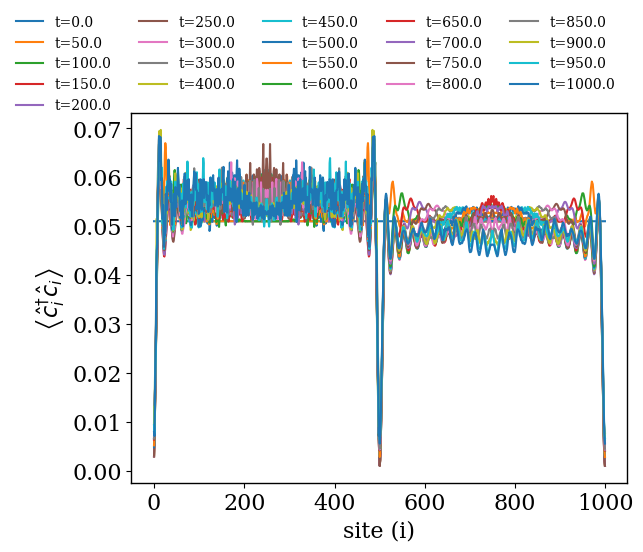

In [60]:
prequench_state = np.loadtxt('ODFF_shift_eigvec_t=1_v=0.1_g=1_L=1000.txt').T
prequench_energy = np.loadtxt('ODFF_shift_eigval_t=1_v=0.1_g=1_L=1000.txt')
postquench_state = np.loadtxt('ODFF_shift_eigvec_t=1_v=0.1_g=0_L=1000.txt').T
postquench_energy = np.loadtxt('ODFF_shift_eigval_t=1_v=0.1_g=0_L=1000.txt')
sites = np.linspace(0,999,1000,dtype=int)

#############################################
### plot pre- and post-quench eigenstates ###
#############################################
# plt.plot(sites,np.abs(prequench_state[0])**2,color='black')
# plt.plot(sites,np.abs(postquench_state[0])**2,color='gray')



#########################################################
### occupations; single time, prequench to postquench ###
#########################################################
# time = 100000
# n = [1-NCorr(i,i,1000,1,prequench_state,postquench_state,postquench_energy,time) for i in sites]
# plt.plot(sites,n,label='t='+str(np.round(time,3)),color='black')
# plt.xlabel('site (i)',fontsize=16)
# plt.ylabel(r'$\left\langle \hat{c}_{i}^{\dagger}\hat{c}_{i}\right\rangle$',fontsize=16)
# plt.tick_params(labelsize=16)
# plt.legend(ncols=5)



##########################################################
### occupations; time evolved, prequench to postquench ###
##########################################################
# times = np.linspace(0,999,10)
# for time in times:
#     P = GaussianMat(101,prequench_state,postquench_state,postquench_energy,time)
#     corr = NCorrMat(P)
#     n = [corr[i][i] for i in sites]
#     plt.plot(sites,n,label='t='+str(np.round(time,3)))
# plt.xlabel('site (i)',fontsize=16)
# plt.ylabel(r'$\left\langle \hat{c}_{i}^{\dagger}\hat{c}_{i}\right\rangle$',fontsize=16)
# plt.tick_params(labelsize=16)
# plt.legend(ncols=5,loc='upper right',bbox_to_anchor=(1,1.15),frameon=False,shadow=True)



#########################################################
### occupations; single time, postquench to prequench ###
#########################################################
# time = 100
# j=500
# P = GaussianMat(51,postquench_state,prequench_state,prequench_energy,time)
# corr = NCorrMat(P)
# n = [corr[i][i] for i in sites]
# plt.plot(sites,n,marker='.',label='t='+str(np.round(time,3)),color='black')
# plt.xlabel('site (i)',fontsize=16)
# plt.ylabel(r'$\left\langle \hat{c}_{i}^{\dagger}\hat{c}_{i}\right\rangle$',fontsize=16)
# plt.tick_params(labelsize=16)
# plt.legend(ncols=5)



##########################################################
### occupations; time evolved, postquench to prequench ###
##########################################################
times = np.linspace(0,1000,21)
for time in times:
    P = GaussianMat(51,postquench_state,prequench_state,prequench_energy,time)
    corr = NCorrMat(P)
    n = [corr[i][i] for i in sites]
    plt.plot(sites,n,label='t='+str(np.round(time,3)))
plt.xlabel('site (i)',fontsize=16)
plt.ylabel(r'$\left\langle \hat{c}_{i}^{\dagger}\hat{c}_{i}\right\rangle$',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(ncols=5,loc='upper right',bbox_to_anchor=(1,1.3),frameon=False,shadow=True)



######################################################################
### i != j correlations; many times, prequench to postquench state ###
######################################################################
# j=500
# times = np.linspace(0,100,21,dtype=int)
# for time in times:
#     P = GaussianMat(251,prequench_state,postquench_state,postquench_energy,time)
#     corr = NCorrMat(P)
#     n = [corr[i][j] for i in sites]
#     plt.plot(sites,n,label='t='+str(np.round(time,3)))
# plt.xlabel('site (i)',fontsize=16)
# plt.ylabel(r'$\left\langle \hat{c}_{i}^{\dagger}\hat{c}_{j}\right\rangle$ $j=$' + str(j),fontsize=16)
# plt.tick_params(labelsize=16)
# plt.legend(ncols=5,loc='upper right',bbox_to_anchor=(1,1.3),frameon=False,shadow=True)


### Quench: half-step, L=1000; open boundary conditions

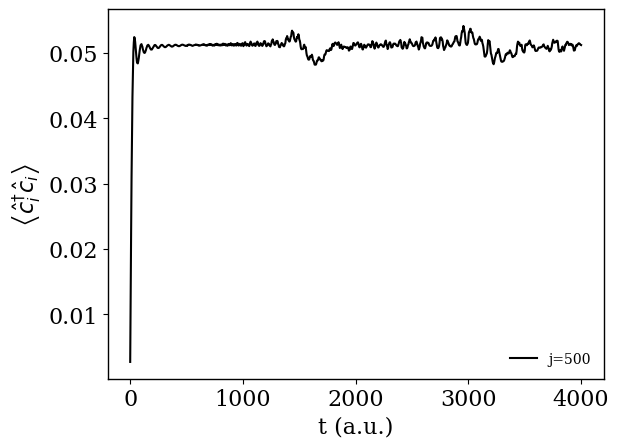

In [69]:
prequench_state = np.loadtxt('ODFF_shift_eigvec_t=1_v=0.1_g=1_L=1000_OBC.txt').T
prequench_energy = np.loadtxt('ODFF_shift_eigval_t=1_v=0.1_g=1_L=1000_OBC.txt')
postquench_state = np.loadtxt('ODFF_shift_eigvec_t=1_v=0.1_g=0_L=1000_OBC.txt').T
postquench_energy = np.loadtxt('ODFF_shift_eigval_t=1_v=0.1_g=0_L=1000_OBC.txt')
sites = np.linspace(0,999,1000,dtype=int)

#############################################
### plot pre- and post-quench eigenstates ###
#############################################
# plt.plot(sites,np.abs(prequench_state[0])**2,color='black')
# plt.plot(sites,np.abs(postquench_state[0])**2,color='gray')



#########################################################
### occupations; single time, prequench to postquench ###
#########################################################
# time = 3500
# n = [1-NCorr(i,i,1000,51,prequench_state,postquench_state,postquench_energy,time) for i in sites]
# plt.plot(sites,n,label='t='+str(np.round(time,3)),color='black')
# plt.xlabel('site (i)',fontsize=16)
# plt.ylabel(r'$\left\langle \hat{c}_{i}^{\dagger}\hat{c}_{i}\right\rangle$',fontsize=16)
# plt.tick_params(labelsize=16)
# plt.legend(ncols=5)



##########################################################
### occupations; time evolved, prequench to postquench ###
##########################################################
# times = np.linspace(0,4000,21)
# for time in times:
#     n = [1-NCorr(i,i,1000,51,prequench_state,postquench_state,postquench_energy,time) for i in sites]
#     plt.plot(sites,n,label='t='+str(np.round(time,3)))
# plt.xlabel('site (i)',fontsize=16)
# plt.ylabel(r'$\left\langle \hat{c}_{i}^{\dagger}\hat{c}_{i}\right\rangle$',fontsize=16)
# plt.tick_params(labelsize=16)
# plt.legend(ncols=5,loc='upper right',bbox_to_anchor=(1,1.45),fancybox=True,shadow=True)



####################################################################
### time evolved single site occupation; prequench to postquench ###
####################################################################
times = np.linspace(0,4000,1001)
nj = []
j = 500
for t in times:
    P = GaussianMat(51,prequench_state,postquench_state,postquench_energy,t)
    corr = NCorrMat(P)
    nj.append(corr[j][j])
plt.plot(times,nj,color='black',label='i='+str(j))
plt.xlabel('t (a.u.)',fontsize=16)
plt.ylabel(r'$\left\langle \hat{c}_{i}^{\dagger}\hat{c}_{i}\right\rangle$',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(frameon=False)

# Quenched State Dynamics (Fix)

In [ ]:
# single particle overlap function
def overlap(k,kp,L,Lp):
    dumlist = []
    z = complex(0,k-kp)
    for i in range(L):
        dumlist.append(np.exp(z*i))
    return (np.sqrt(L*Lp))**(-1) * np.sum(dumlist)

def geometric_series(r,num):
    return (1-r**num)/(1-r)

def kp(m,length):
    return float(2*np.pi*m / length)

# check formulas
# L = int(20)
# kprime = kp(1,L+2)
# overlap(0,kp(0,L+2),L,L+2) #,(np.sqrt(L*(L+2)))**(-1) * geometric_series(np.exp(complex(0,-kprime)),L)

# verify that probabilities add up
# np.sum([np.abs(overlap(kp(1,L),kp(-(L+2)/2 + i,L+2),L,L+2))**2 for i in range(L+2)])
# np.sum( [(np.sqrt(L*(L+2)))**(-1) * geometric_series(np.exp(complex(0,-float(kp(-(L+2)/2 + i,L+2)))),L) for i in range(L+2)]  )

1.0000000000000002

Text(0.5, 0, 'time (a.u.)')

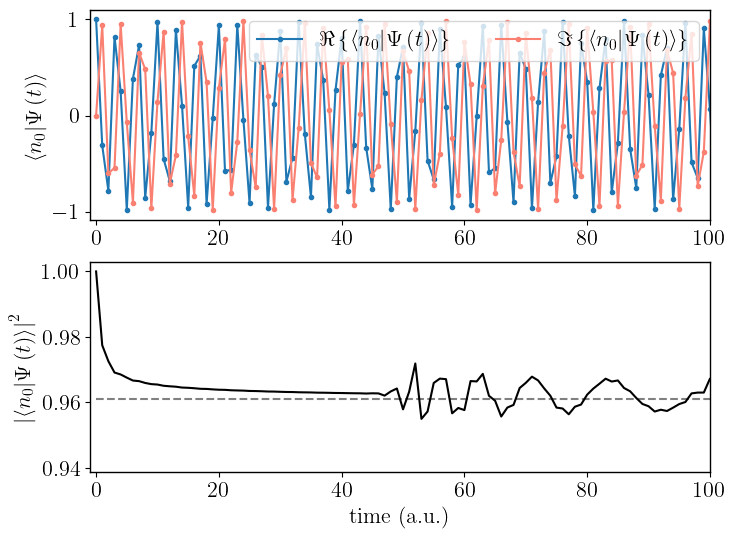

In [372]:
def Psi(k,time,L,t,v):
    wavefun = []
    for i in range(L+2):
        kprime = kp(-(L+2)/2 + i,L+2)
        omegak = ODFFHam(t,v,kprime)
        tim = np.exp(complex(0,-omegak*time))
        wavefun.append(tim*overlap(0,kprime,L,L+2)*np.conj(overlap(k,kprime,L,L+2)))
    return np.sum(wavefun)

t = np.linspace(0,1000,1001)
# timeevol_real = [np.real(Psi(kp(10,100),tim,100,0.1,0.1)) for tim in t]
# with open('pickles/time_evolve_real_L=100_k=10_t=0.1.pkl', 'wb') as file:
#     pickle.dump(timeevol_real, file)
# timeevol_imag = [np.imag(Psi(kp(10,100),tim,100,0.1,0.1)) for tim in t]
# with open('pickles/time_evolve_imag_L=100_k=10_t=0.1.pkl', 'wb') as file:
#     pickle.dump(timeevol_imag, file)
# timeevol_mag = [np.abs(Psi(kp(10,100),tim,100,0.1,0.1))**2 for tim in t]
# with open('pickles/time_evolve_mag_L=100_k=10_t=0.1.pkl', 'wb') as file:
#     pickle.dump(timeevol_mag, file)

with open('pickles/time_evolve_mag_L=100_k=0_t=1.pkl', 'rb') as file:
    timeevol_magnitude = pickle.load(file)
with open('pickles/time_evolve_imag_L=100_k=0_t=1.pkl', 'rb') as file:
    timeevol_imaginary = pickle.load(file)
with open('pickles/time_evolve_real_L=100_k=0_t=1.pkl', 'rb') as file:
    timeevol_real = pickle.load(file)

# configure plot
fig = plt.figure(figsize=(8,6))
fig.tight_layout()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(t,timeevol_real,marker='.',label=r'$\Re\left\{ \left\langle n_{0}\big|\Psi\left(t\right)\right\rangle \right\}$',color='tab:blue')
ax1.plot(t,timeevol_imaginary,marker='.',label=r'$\Im\left\{ \left\langle n_{0}\big|\Psi\left(t\right)\right\rangle \right\}$',color='salmon')
ax1.set_ylabel(r'$\left\langle n_{0}\big|\Psi\left(t\right)\right\rangle$',fontsize=16)
ax1.set_xlim(-1,100)
ax1.tick_params(labelsize=16)
ax1.legend(loc='upper right',fontsize=16,ncols=2)

# ax2.plot(t,[np.abs((100/(100*102))*geometric_series(np.exp(complex(0,kp(10,102))),100))**2 for i in t],color='gray',linestyle='dashed')
ax2.plot(t,[np.abs((100**2/(100*102)))**2 for i in t],color='gray',linestyle='dashed')
ax2.plot(t,timeevol_magnitude,color='black')
ax2.tick_params(labelsize=16)
ax2.set_xlim(-1,100)
ax2.set_ylabel(r'$\left|\left\langle n_{0}\big|\Psi\left(t\right)\right\rangle \right|^2$',fontsize=16)
ax2.set_xlabel('time (a.u.)',fontsize=16)

# np.sum([np.abs(Psi(kp(-50+i,100),400,100,1,0.1))**2 for i in range(101)])

# Equal-time One-particle Correlation Functions After a Quench

In [384]:
def QC(t,L,k,xi,xj,J,v):
    # t: time
    # L: number of sites
    # k: pre-quench momentum mode
    # i,j: site indices
    # J: hopping parameter
    # v: on-site parameter
    correlation = []
    for m in range(L+2):
        k1 = kp(-(L+2)/2 + m,L+2)
        omegak1 = ODFFHam(J,v,k1)
        for n in range(L+2):
            k2 = kp(-(L+2)/2 + n,L+2)
            omegak2 = ODFFHam(J,v,k2)
            z = complex(0,(omegak1-omegak2)*t)
            dumdum = ((L+2)**(-1)) * np.conj(overlap(k,k1,L,L+2))*overlap(k,k2,L,L+2)*np.exp(z)*np.exp(complex(0,k1*xi))*np.exp(complex(0,-k2*xj))
            correlation.append(dumdum)
    return np.sum(correlation)

xi = 50
xj = 50
k = 0
J = 1
v= 0.1
L = 100

time = np.linspace(0,100,101)
QCt = [QC(t,L,k,xi,xj,J,v) for t in time]

with open('pickles/one_part_quench_corr_i=50_j=50.pkl', 'wb') as file:
    pickle.dump(QCt, file)

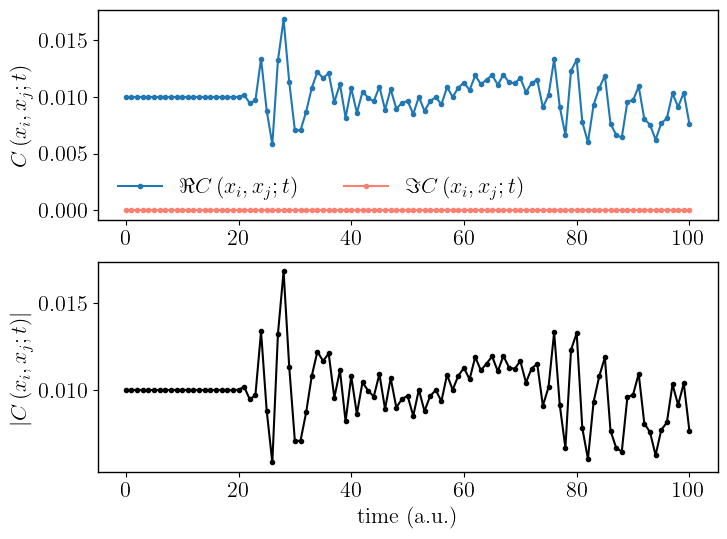

In [385]:
with open('pickles\one_part_quench_corr_i=50_j=50.pkl', 'rb') as file:
    QCt = pickle.load(file)

# configure plot
fig = plt.figure(figsize=(8,6))
fig.tight_layout()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(time,np.real(QCt),marker='.',color='tab:blue',label=r'$\Re C\left(x_{i},x_{j};t\right)$')
ax1.plot(time,np.imag(QCt),marker='.',color='salmon',label=r'$\Im C\left(x_{i},x_{j};t\right)$')
ax1.set_ylabel(r'$C\left(x_{i},x_{j};t\right)$',fontsize=16)
ax1.tick_params(labelsize=16)
ax1.legend(ncols=2,fontsize=16,frameon=False)

ax2.plot(time,np.abs(QCt),marker='.',color='black')
ax2.set_xlabel(r'time (a.u.)',fontsize=16)
ax2.set_ylabel(r'$\left|C\left(x_{i},x_{j};t\right)\right|$',fontsize=16)
ax2.tick_params(labelsize=16)

In [401]:
# plot spatial profile as a fucntion of time #
t = 20 
xj = 50
k = kp(1,100)
J = 1
v= 0.1
L = 100

site = np.linspace(0,102,102)
QCx = [QC(t,L,k,xi,xj,J,v) for xi in site]

with open('pickles/one_part_quench_corr_t=20_j=50.pkl', 'wb') as file:
    pickle.dump(QCx, file)

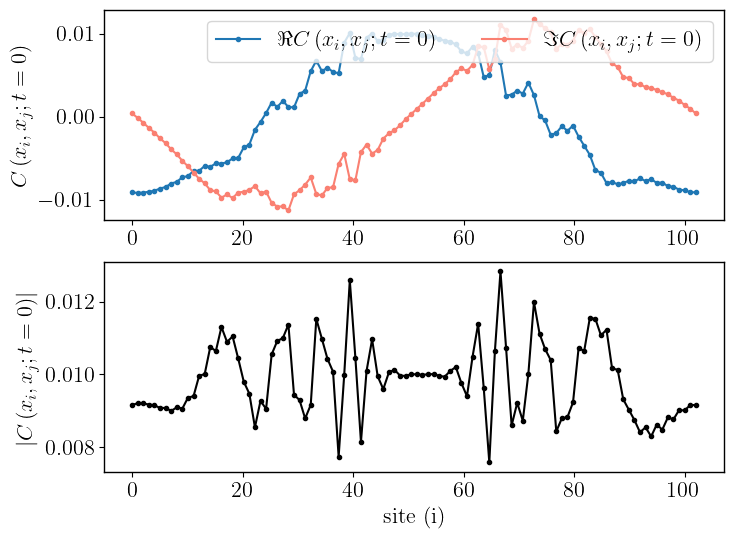

In [402]:
with open('pickles/one_part_quench_corr_t=20_j=50.pkl', 'rb') as file:
    QCx = pickle.load(file)

# configure plot
fig = plt.figure(figsize=(8,6))
fig.tight_layout()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(site,np.real(QCx),marker='.',color='tab:blue',label=r'$\Re C\left(x_{i},x_{j};t=0\right)$')
ax1.plot(site,np.imag(QCx),marker='.',color='salmon',label=r'$\Im C\left(x_{i},x_{j};t=0\right)$')
ax1.set_ylabel(r'$C\left(x_{i},x_{j};t=0\right)$',fontsize=16)
ax1.tick_params(labelsize=16)
ax1.legend(ncols=2,fontsize=16,frameon=True,loc='upper right')

ax2.plot(site,np.abs(QCx),marker='.',color='black')
ax2.set_xlabel(r'site (i)',fontsize=16)
ax2.set_ylabel(r'$\left|C\left(x_{i},x_{j};t=0\right)\right|$',fontsize=16)
ax2.tick_params(labelsize=16)

# Playground

In [ ]:
# testmode = [int(1+2*i) for i in range(50)]
# ground_overlap = [np.abs(np.linalg.det(SlaterMatN(1+2*i,eigenvectors,planewaves)))**2 for i in range(50)]
# plt.plot(testmode,ground_overlap,marker='.',color='black')
# plt.xlabel('Number of Particles ($N$)',fontsize=16)
# plt.ylabel(r'$\left|\left\langle E_{0}\big|GS\right\rangle \right|^{2}$',fontsize=16)
# plt.tick_params(labelsize=16)

test = GaussianMat(51,planewaves,eigenvectors,eigenvalues,1).T
blah = np.array([np.zeros(100)])
blah[0][49] = 1
blah
np.append(test,blah,axis=0).T.shape,np.conj(np.append(test,blah,axis=0).T).shape

In [ ]:
eigenvalues = np.loadtxt('ODFF_eigval_t=1_v=0.1_g=0.1_L=100.txt')
eigenvectors = np.loadtxt('ODFF_eigvec_t=1_v=0.1_g=0.1_L=100.txt').T # the suffix .T takes the transpose of the data such that the eigenstates are the rows of the full matrix U

planewaves = np.loadtxt('ODFF_eigvec_t=1_v=0.1_g=0_L=100.txt').T

def SPOverlap(L,mode1,mode2):
    # L: number of sites
    # wf1,wf2: LxL matrix of eigenvectors; also called U matrix
    # mode1,mode2: relevant eigenenergy mode number
    overlap = []
    for i in range(L):
        dumdum = np.conj(eigenvectors[mode1][i]) * np.exp(complex(0,mode2 * i)) / np.sqrt(L)
        overlap.append(dumdum)
    return np.sum(overlap)

def GSSlateMatrix(L,N,modes):
    # L: number sites
    # N: number of particles, please be odd
    # modes: list of L values ranging from 0 to L-1 corresponding to the 
    #   occupied modes
    """
    NOTE: this function is highly dependent on the above function SPOverlap
    which is not generic!! It calls on 'eigenvectors,' which is data generated
    in c++ that depends on various Hamiltonian parameters. Note that one must
    insure that L is the same here as when generating 'eigenvectors.'

    We are assuming here that the prequench state is the N particle
    ground state of a translationally invariant free-fermion Hamiltonian 
    characterized by a hopping J and a CONSTANT on-site potential v. 
    """
    S = np.zeros((N,N),dtype=complex)
    k = [2*np.pi*i/L for i in range(int(L/2+1))] # defines all possible k values allowed by PBC on a lattice with L sites
    GSk = [] # ground state momentum modes
    for i in range(L):
        if i==0:
            mom = k[i]
        elif i%2==1:
            mom = k[int(i/2 + 1)]
        else: 
            mom = -k[int(i/2)]
        GSk.append(mom)

    for l in range(N):
        for m in range (N):
            S[l,m] = SPOverlap(L,modes[l],GSk[m])
    
    return S

number = 51
testmode = np.linspace(0,100,101,dtype=int)
np.abs(np.linalg.det(GSSlateMatrix(100,number,testmode)))**2

# # ground_overlap = [np.abs(np.linalg.det(GSSlateMatrix(100,i,testmode)))**2 for i in range(101)]
# plt.plot(testmode,ground_overlap,marker='.',color='black')
# plt.xlabel('Number of Particles ($N$)',fontsize=16)
# plt.ylabel(r'$\left|\left\langle E_{0}\big|GS\right\rangle \right|^{2}$',fontsize=16)
# plt.tick_params(labelsize=16)

In [ ]:
def SlaterMat(L,Num):
    # L: number of sites
    # N: number of particles, odd please
    D = np.zeros((Num,Num),dtype=np.float64)

    k = [2*np.pi*i/L for i in range(int(L/2+1))]
    momentum = []
    for i in range(L):
        if i==0:
            mom = k[i]
        elif i%2==1:
            mom = k[int(i/2 + 1)]
        else: 
            mom = -k[int(i/2)]
        momentum.append(mom)

    # print(momentum)

    for l in range(Num):
        for m in range(Num):
            z = complex(0,momentum[l])
            test = np.sin(momentum[m]) 
            D[l,m] = ( np.exp(z) * test )/ L
    return D